In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib
import streamlit as s

In [3]:
df=pd.read_csv('heart_disease_2020.csv')

In [4]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
df.shape

(319795, 18)

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


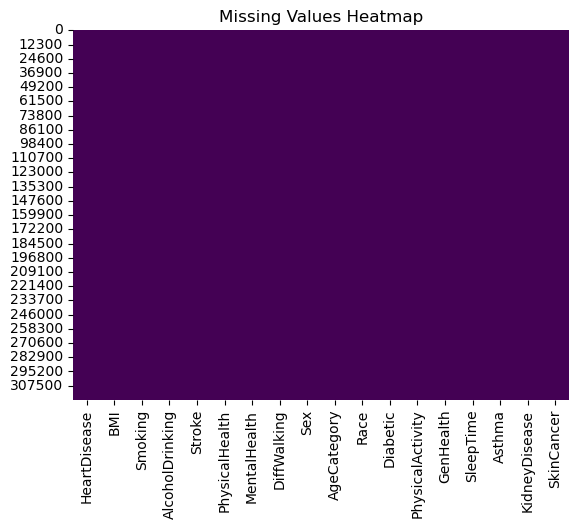

In [8]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

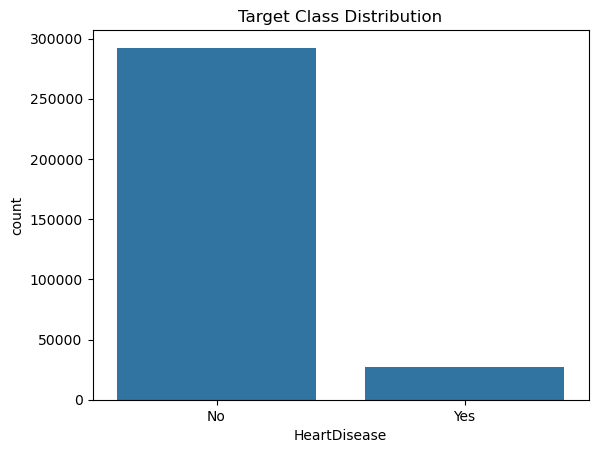

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [9]:
sns.countplot(data=df, x='HeartDisease')
plt.title("Target Class Distribution")
plt.show()

# View value counts
print(df['HeartDisease'].value_counts())

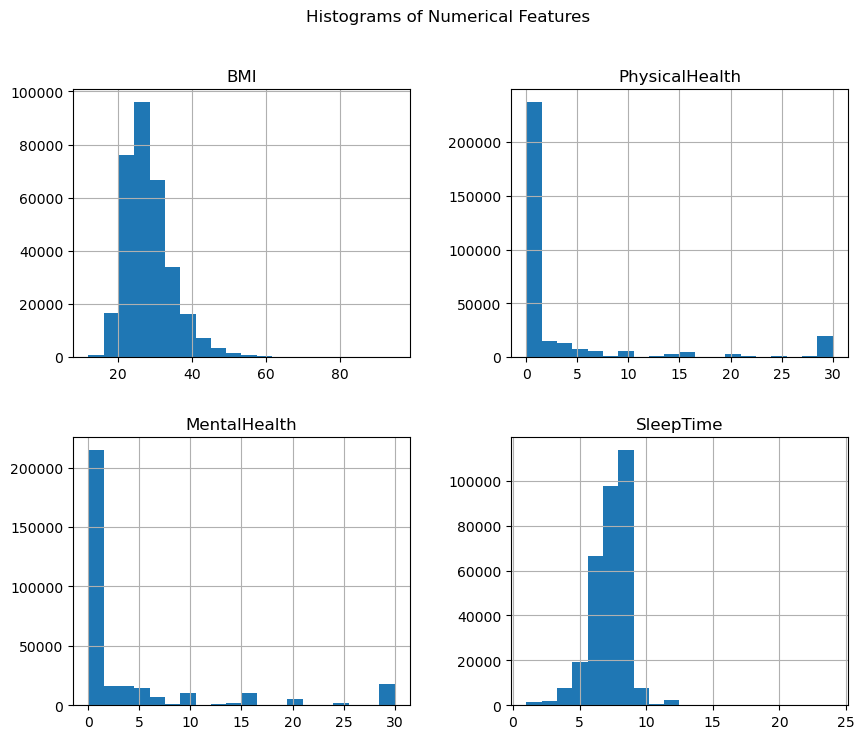

In [10]:
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
df[num_cols].hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

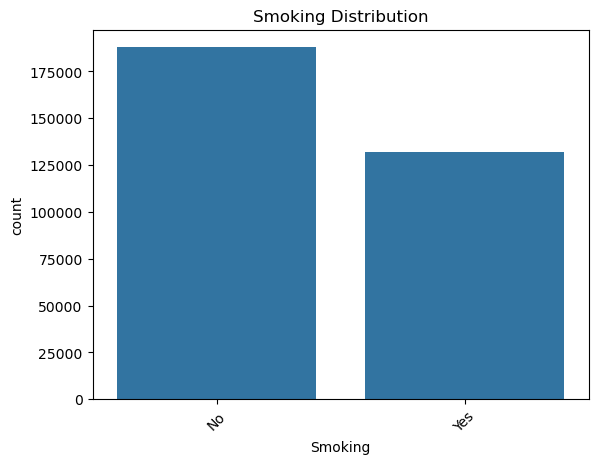

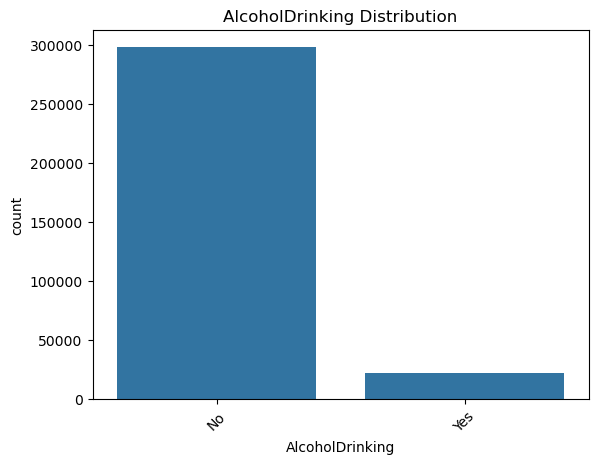

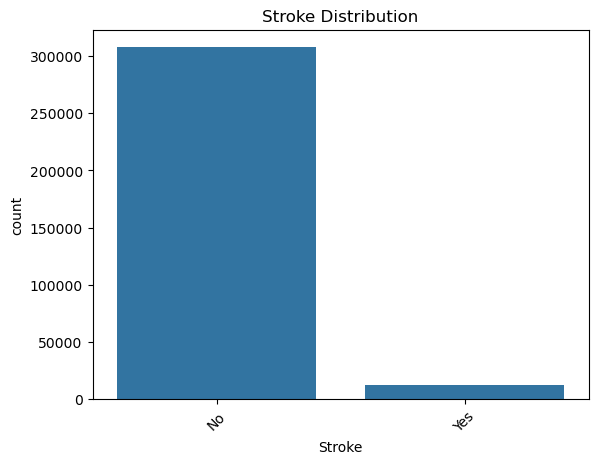

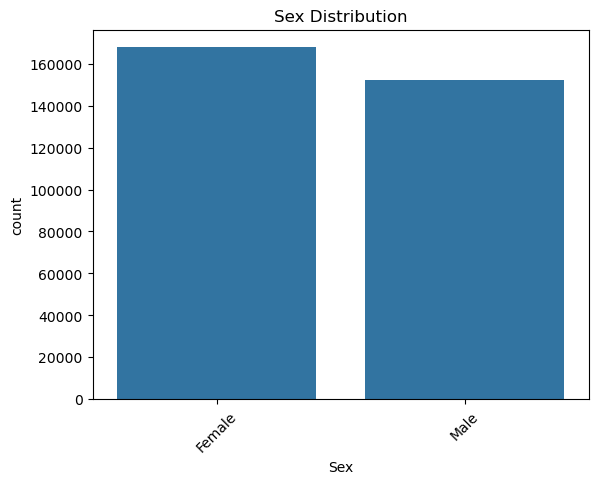

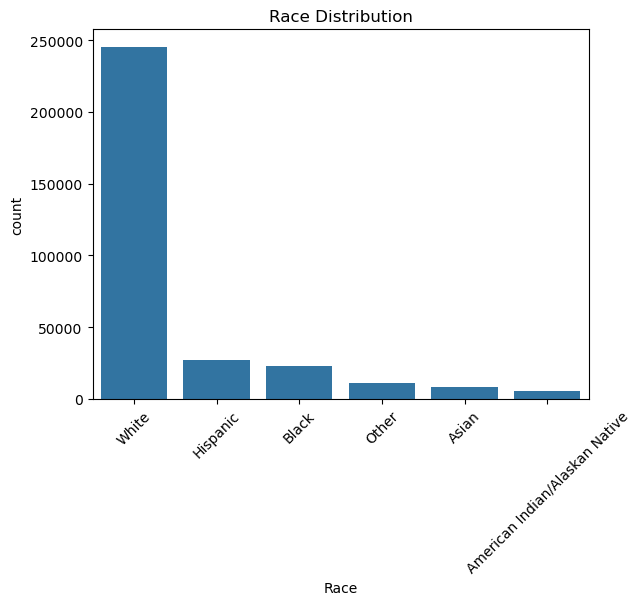

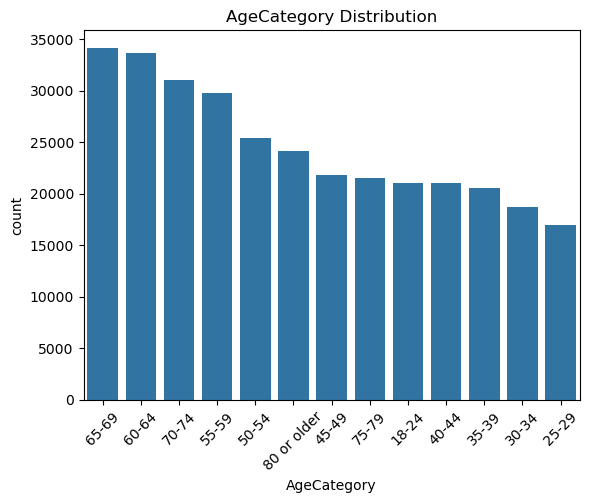

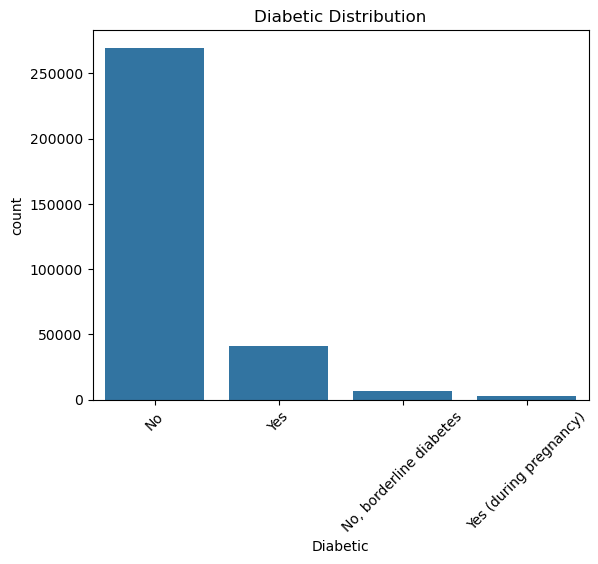

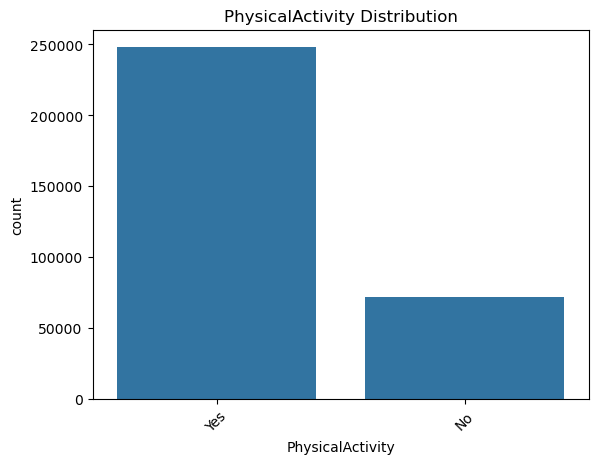

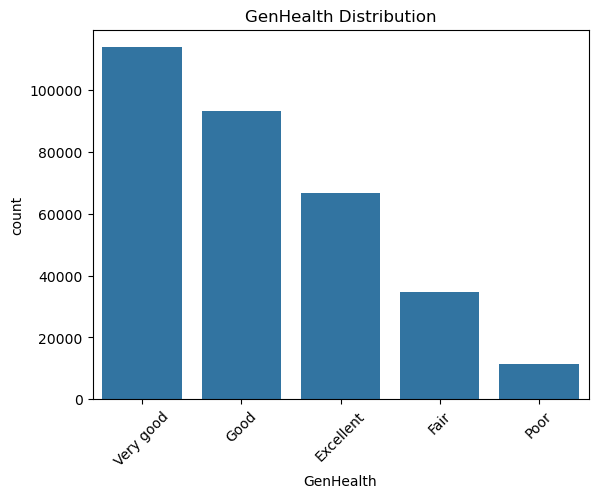

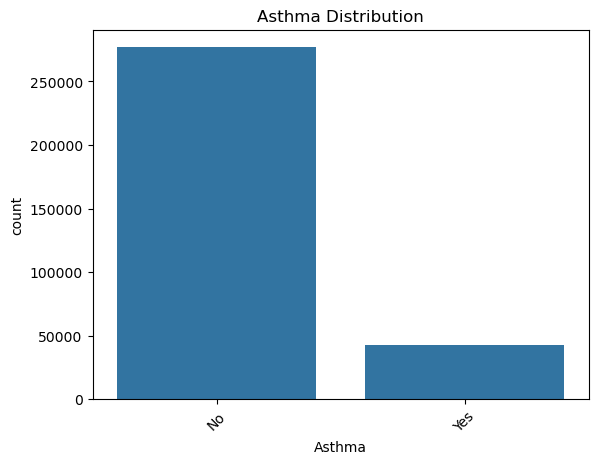

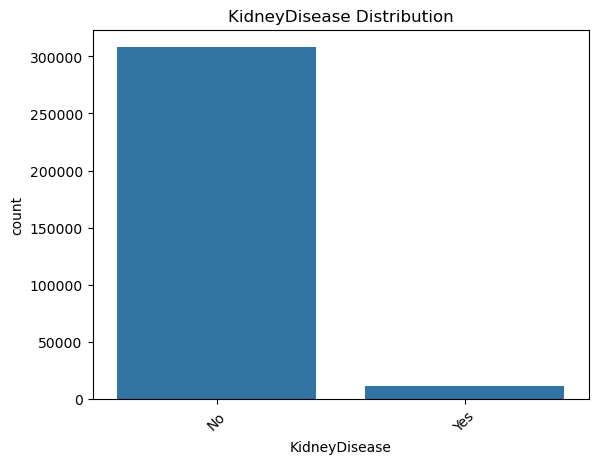

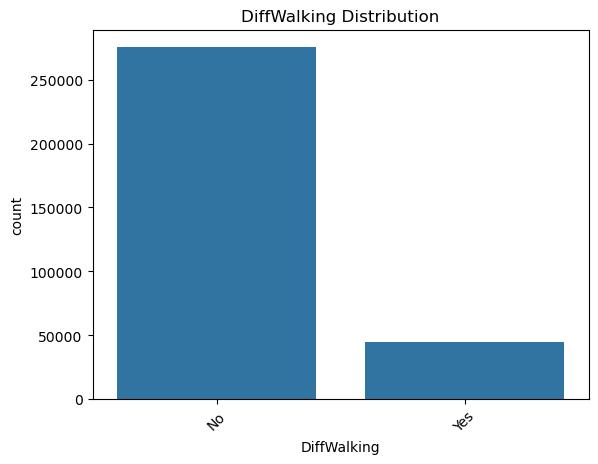

In [11]:
cat_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'Sex', 'Race', 'AgeCategory', 
            'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 
            'KidneyDisease', 'DiffWalking']

for col in cat_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} Distribution")
    plt.show()


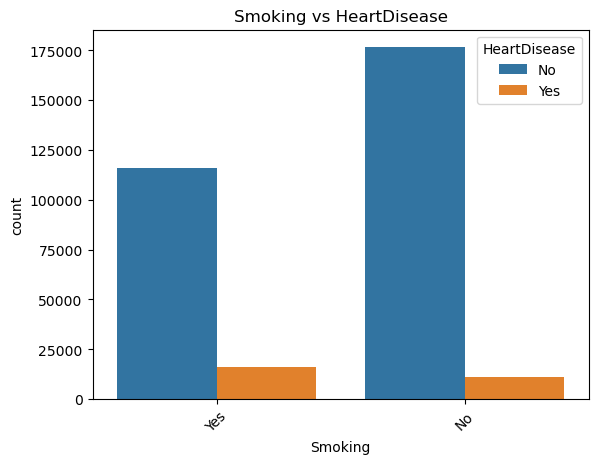

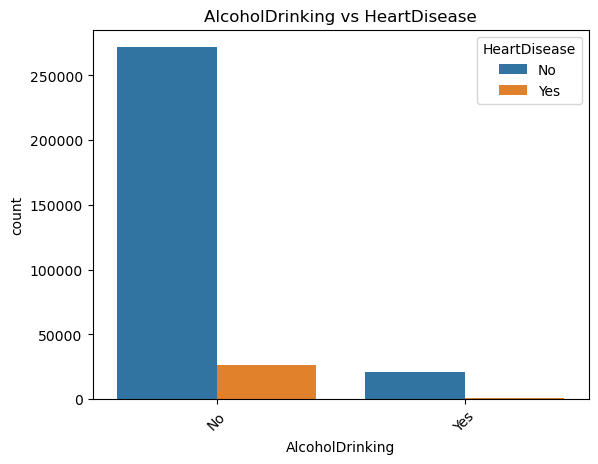

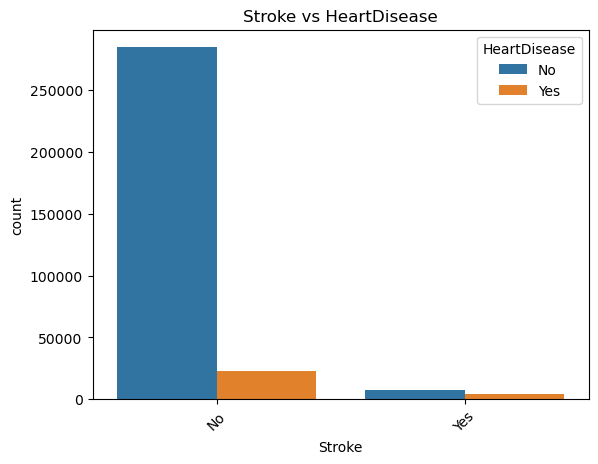

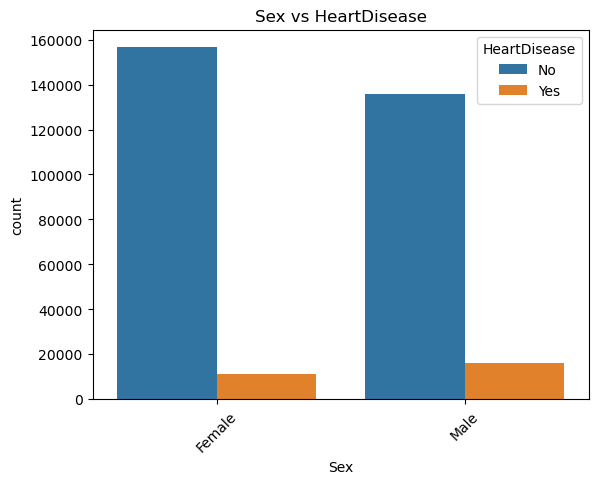

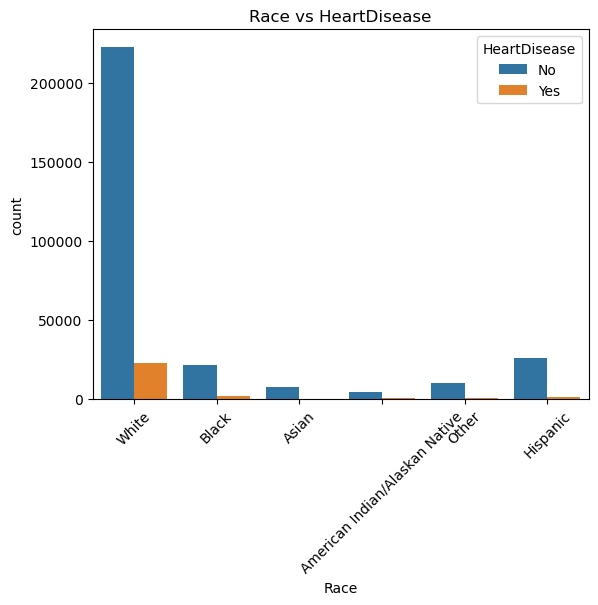

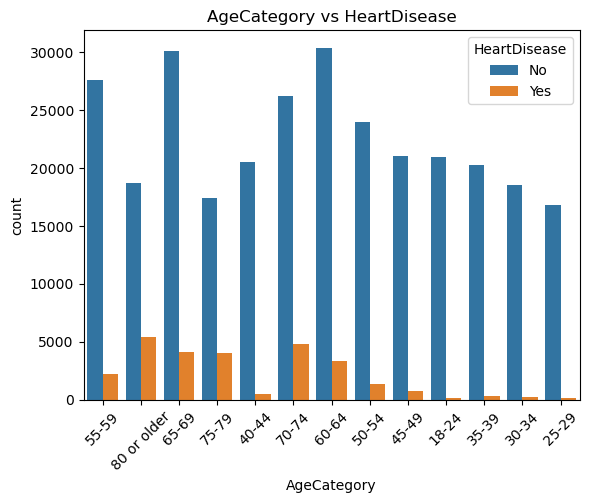

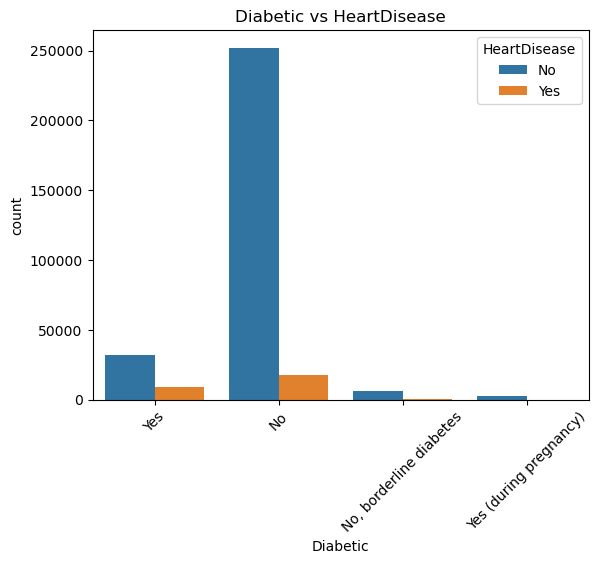

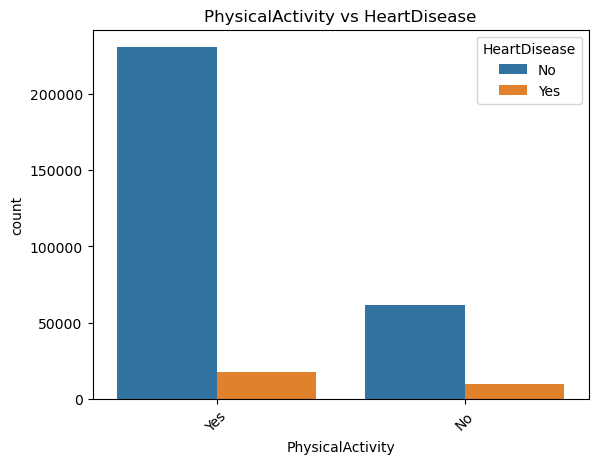

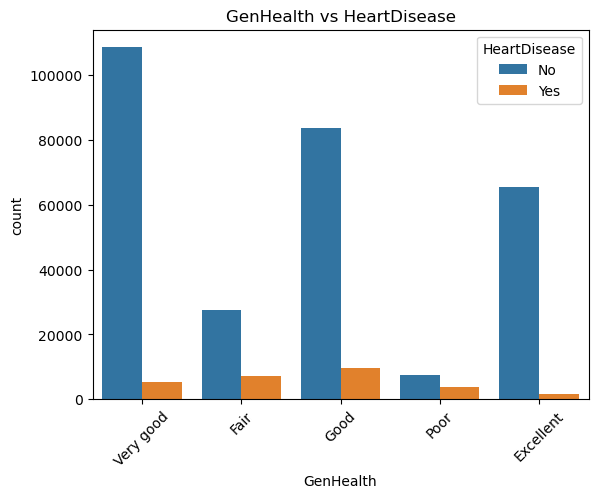

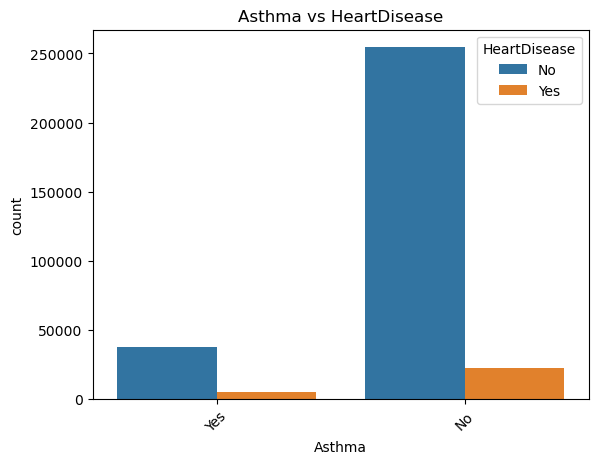

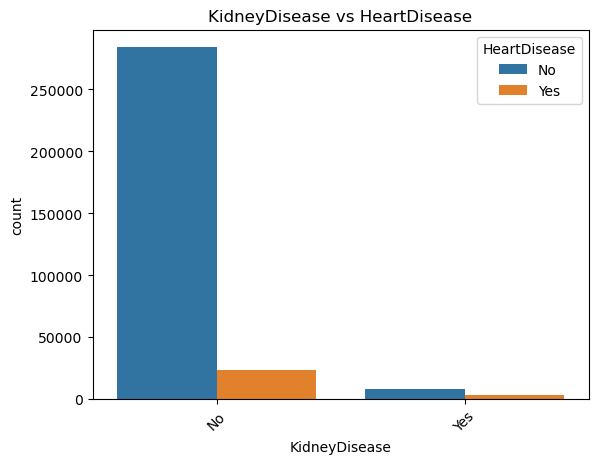

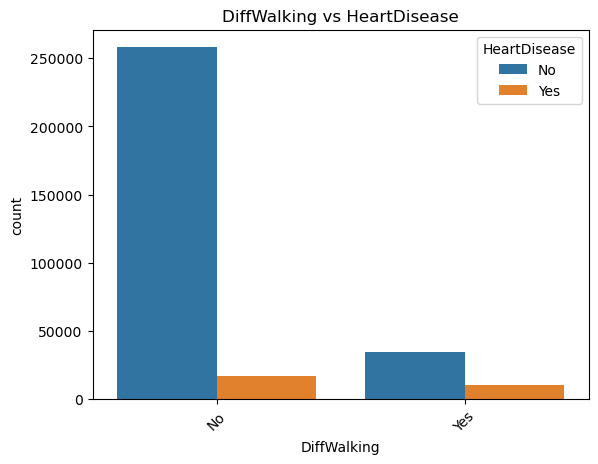

In [12]:
for col in cat_cols:
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f"{col} vs HeartDisease")
    plt.xticks(rotation=45)
    plt.show()


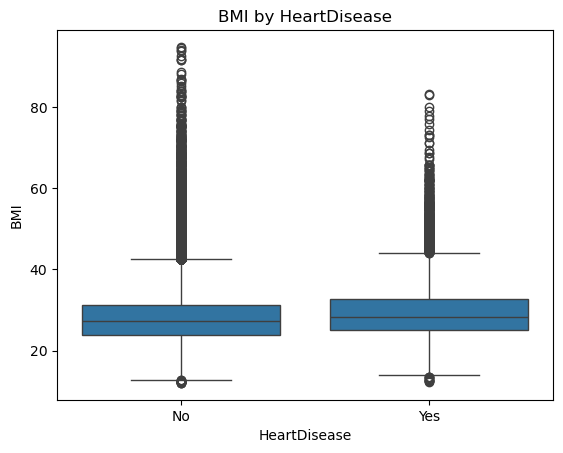

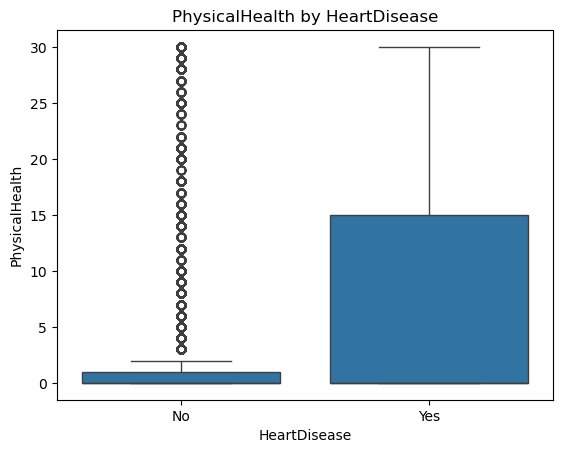

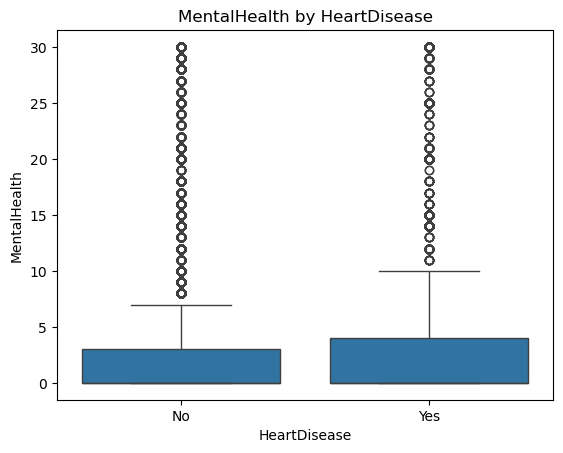

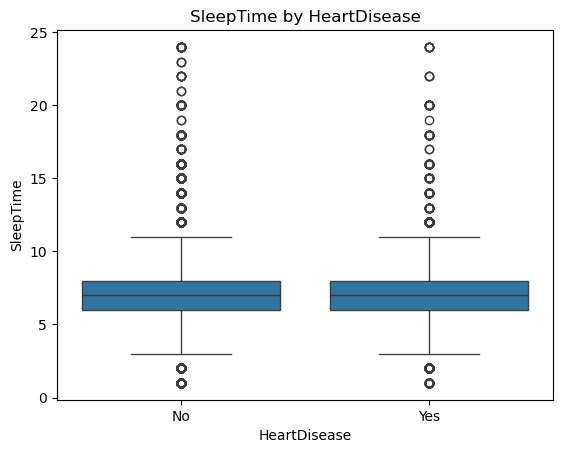

In [13]:
for col in num_cols:
    sns.boxplot(data=df, x='HeartDisease', y=col)
    plt.title(f"{col} by HeartDisease")
    plt.show()


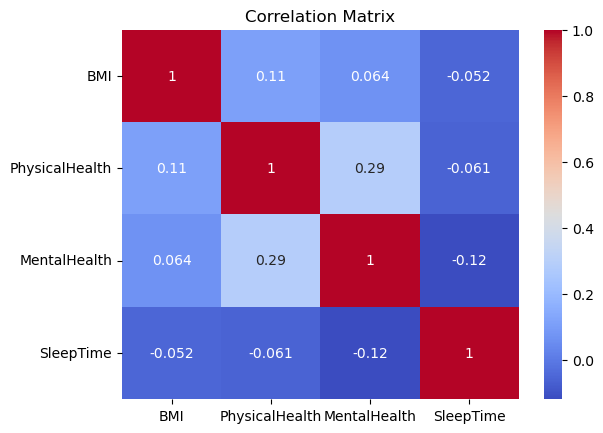

In [14]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [15]:
df=df.dropna()

In [16]:
print(df.columns.tolist())

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [17]:
##Create a copy of dataframe
df_before_ohe = df.copy()

In [18]:
df = pd.get_dummies(
    df,
    columns=[  # update this list based on the actual columns in your DataFrame
        'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
        'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
    ],
    drop_first=True
)

In [19]:
df

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,No,16.60,3,30,5,True,False,False,False,False,...,True,False,True,False,False,False,True,True,False,True
1,No,20.34,0,0,7,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,No,26.58,20,30,8,True,False,False,False,True,...,True,False,True,True,False,False,False,True,False,False
3,No,24.21,0,0,6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,No,23.71,28,0,8,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,7,0,6,True,False,False,True,True,...,True,False,False,True,False,False,False,True,False,False
319791,No,29.84,0,0,5,True,False,False,False,True,...,False,False,True,False,False,False,True,True,False,False
319792,No,24.24,0,0,6,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
319793,No,32.81,0,0,12,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [20]:
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

In [21]:
X = df.drop(['HeartDisease'], axis=1).to_numpy()
y = df['HeartDisease'].to_numpy()

##Split data into train and test set
train_size = 0.7
random_state = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

In [22]:
df

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3,30,5,True,False,False,False,False,...,True,False,True,False,False,False,True,True,False,True
1,0,20.34,0,0,7,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,0,26.58,20,30,8,True,False,False,False,True,...,True,False,True,True,False,False,False,True,False,False
3,0,24.21,0,0,6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,0,23.71,28,0,8,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7,0,6,True,False,False,True,True,...,True,False,False,True,False,False,False,True,False,False
319791,0,29.84,0,0,5,True,False,False,False,True,...,False,False,True,False,False,False,True,True,False,False
319792,0,24.24,0,0,6,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
319793,0,32.81,0,0,12,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=8, class_weight='balanced')
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=8)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Track best model
best_f1 = 0
best_model = None
best_model_name = ""

# Train and evaluate
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")

    # Track best
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_model_name = name

# Show best model
print(f"\nBest Model: {best_model_name} (F1 Score: {best_f1:.4f})")

# Save best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("Model saved as best_model.pkl")



Model: Logistic Regression
F1 Score: 0.3506
Accuracy: 0.7491
Precision: 0.2256
Recall: 0.7866

Model: Decision Tree
F1 Score: 0.2289
Accuracy: 0.8655
Precision: 0.2260
Recall: 0.2318

Model: Random Forest
F1 Score: 0.1580
Accuracy: 0.9027
Precision: 0.3097
Recall: 0.1061

Model: Gradient Boosting
F1 Score: 0.1527
Accuracy: 0.9154
Precision: 0.5563
Recall: 0.0885

Best Model: Logistic Regression (F1 Score: 0.3506)
Model saved as best_model.pkl


In [28]:
import joblib
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'class_weight': ['balanced']
}

model = RandomForestClassifier(random_state=8)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',       # because it's imbalanced classification
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # use all CPU cores
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score: {:.4f}".format(grid_search.best_score_))

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score: 0.3757
              precision    recall  f1-score   support

           0       0.96      0.86      0.90     87679
           1       0.28      0.59      0.38      8260

    accuracy                           0.83     95939
   macro avg       0.62      0.72      0.64     95939
weighted avg       0.90      0.83      0.86     95939



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01],                      # Regularization strength
    'solver': ['lbfgs'],             # Compatible solvers
    'penalty': ['l2'],                            # L2 penalty only
    'class_weight': ['balanced']
}

model_lr = LogisticRegression(max_iter=1000)

grid_lr = GridSearchCV(
    estimator=model_lr,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train_scaled, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best F1 Score: {:.4f}".format(grid_lr.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Logistic Regression Params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score: 0.3473


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbt = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

model_gbt = GradientBoostingClassifier(random_state=8)

grid_gbt = GridSearchCV(
    estimator=model_gbt,
    param_grid=param_grid_gbt,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_gbt.fit(X_train_scaled, y_train)

print("Best Gradient Boosting Params:", grid_gbt.best_params_)
print("Best F1 Score: {:.4f}".format(grid_gbt.best_score_))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

In [32]:
# Save the best model
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

# Save the scaler (used to transform input data)
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [ ]:
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load('best_random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# App title
st.title("❤️ Heart Disease Prediction")

st.write("Enter your health information below:")

# Collect user input (example with 15 features — update based on your dataset)
bmi = st.number_input("BMI", min_value=10.0, max_value=60.0)
physical_health = st.slider("Physical Health (0–30)", 0, 30)
mental_health = st.slider("Mental Health (0–30)", 0, 30)
sleep_time = st.slider("Sleep Time (hours)", 0, 24)

# Example binary features
smoking = st.selectbox("Do you smoke?", ["No", "Yes"])
alcohol = st.selectbox("Do you consume alcohol?", ["No", "Yes"])
stroke = st.selectbox("Have you had a stroke?", ["No", "Yes"])
sex = st.selectbox("Sex", ["Female", "Male"])
diabetic = st.selectbox("Are you diabetic?", ["No", "Yes"])
diff_walking = st.selectbox("Difficulty Walking?", ["No", "Yes"])

# Map categorical to binary
input_data = [
    bmi,
    1 if smoking == "Yes" else 0,
    1 if alcohol == "Yes" else 0,
    1 if stroke == "Yes" else 0,
    1 if sex == "Male" else 0,
    1 if diabetic == "Yes" else 0,
    1 if diff_walking == "Yes" else 0,
    physical_health,
    mental_health,
    sleep_time
]

# Convert and scale
input_array = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_array)

# Predict
if st.button("Predict"):
    prediction = model.predict(input_scaled)[0]
    result = "🛑 At Risk of Heart Disease" if prediction == 1 else "Low Risk"
    st.success(f"Prediction: {result}")


2025-07-30 11:25:52.685 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 11:25:52.791 
  command:

    streamlit run c:\Users\jolie\anaconda3\envs\mldp\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-30 11:25:52.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 11:25:52.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 11:25:52.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 11:25:52.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 11:25:52.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 11:25:52.795 Thread 'MainT

ValueError: X has 10 features, but StandardScaler is expecting 37 features as input.